In [1]:
from ipywidgets import widgets, Button, HBox, VBox
import IPython.display as display
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traitlets
%matplotlib inline

In [2]:
df = pd.read_pickle('df2.pcl')

In [5]:
c = df.index.levels[0].values
idx = pd.IndexSlice
ind = 1

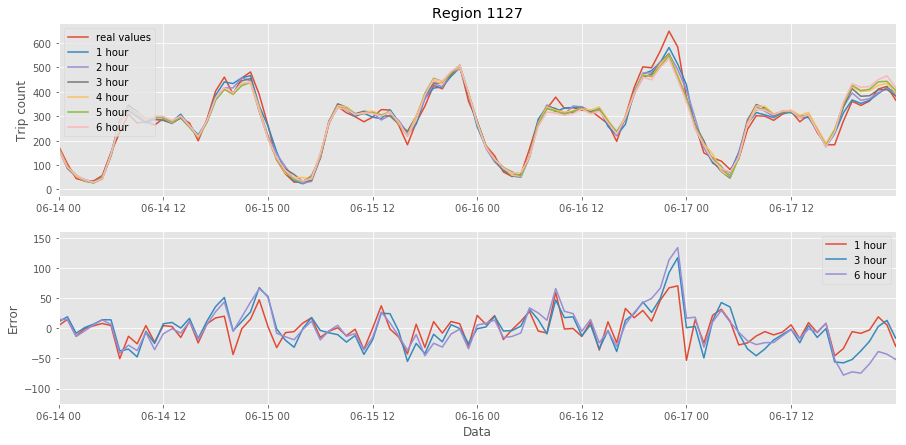

In [6]:
plt.style.use('ggplot')

firstDay = 1
lastDay  = 30

def show():
    setDf = df.loc[idx[c[ind],:]]
    plt.figure(figsize=[15,7])
    plt.subplot(211) 
    plt.plot(setDf.y1.shift(1))
    plt.plot(setDf.y1_pr.shift(1))
    plt.plot(setDf.y2_pr.shift(2))
    plt.plot(setDf.y3_pr.shift(3))
    plt.plot(setDf.y4_pr.shift(4))
    plt.plot(setDf.y5_pr.shift(5))
    plt.plot(setDf.y6_pr.shift(6))
    
    plt.ylabel('Trip count')    
    plt.legend(['real values','1 hour','2 hour','3 hour','4 hour','5 hour','6 hour'])
    plt.xlim(['2016-06-'+str(firstDay)+' 00:00:00','2016-06-'+str(lastDay)+' 23:59:59'])
    plt.title('Region '+ str(c[ind]))
    
    plt.subplot(212)
    plt.plot(setDf.y1.shift(1)-setDf.y1_pr.shift(1))
    plt.plot(setDf.y3.shift(3)-setDf.y3_pr.shift(3))
    plt.plot(setDf.y6.shift(6)-setDf.y6_pr.shift(6))
    plt.legend(['1 hour','3 hour','6 hour'])
    
    plt.xlim(['2016-06-'+str(firstDay)+' 00:00:00','2016-06-'+str(lastDay)+' 23:59:59'])
    plt.ylabel('Error')    
    plt.xlabel('Data')
    
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    
def on_prev_button_clicked(b):
    global ind
    if ind >0:
        ind -= 1
    show()
    
def on_next_button_clicked(b):
    global ind
    if ind < c.shape[0]-1:
        ind += 1
    show()    

Btn1 = Button(description="<<")
Btn1.on_click(on_prev_button_clicked)

Btn2 = Button(description=">>")
Btn2.on_click(on_next_button_clicked)
topBox = HBox([Btn1, Btn2])

#left end of the graph
lw = widgets.IntSlider(
    value=1,
    min=1,
    max=30,
    step=1,
    description='Start',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout_format='d'
)

# right end of the graph
rw = widgets.IntSlider(
    value=30,
    min=1,
    max=30,
    step=1,
    description='End',
    disabled=False,
    continuous_update=False,
    readout=True,
    readout_format='d'
)

traitlets.link((lw, 'value'), (rw, 'min'))
traitlets.link((lw, 'max'),   (rw, 'value'))

def lwChange(obj):
    global firstDay
    firstDay = obj.new
    show()
    
def rwChange(obj):
    global lastDay
    lastDay = obj.new
    show()

lw.observe(lwChange, names='value')
rw.observe(rwChange, names='value')


bottomBox = HBox([lw, rw])

show()
VBox([topBox,bottomBox])